In [1]:
import pandas_oracle.tools as pt # pandas의 oracle DB 연결하는 패키지
import os # 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
os.putenv('NLS_LANG', '.UTF8')
conn = pt.open_connection('../oracle\config.yml')

In [2]:
#x :서비스 타입
#y :연령대별 판매건수

query1 = '''
SELECT *
FROM(SELECT 
       S_LOCATION,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 SUMAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 1
      
Group By  S_LOCATION
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [3]:
#x :서비스 타입
#y :연령대별 판매건수

query2 = '''
SELECT *
FROM(SELECT 
       S_LOCATION,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 SUMAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 2
      
Group By S_LOCATION
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [4]:
#x :서비스 타입
#y :연령대별 판매건수

query3 = '''
SELECT *
FROM(SELECT
       S_LOCATION,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 SUMAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER = 3
      
Group By S_LOCATION
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [5]:
#x :서비스 타입
#y :연령대별 판매건수

query4 = '''
SELECT *
FROM(SELECT 
       S_LOCATION,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 SUMAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_QUARTER =4
      
Group By S_LOCATION
Order By SUMAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 5
'''

In [6]:
df_query1_age = pt.query_to_df(query1, conn, 1000000)
df_query2_age = pt.query_to_df(query2, conn, 1000000)
df_query3_age = pt.query_to_df(query3, conn, 1000000)
df_query4_age = pt.query_to_df(query4, conn, 1000000)
#쿼리의 결과를 데이터 프레임으로 변환해줌 . (쿼리, 오라클 연결객체, 결과를 가져오기 까지 시간)

Text(0, 0.5, '평균판매액')

<Figure size 432x288 with 0 Axes>

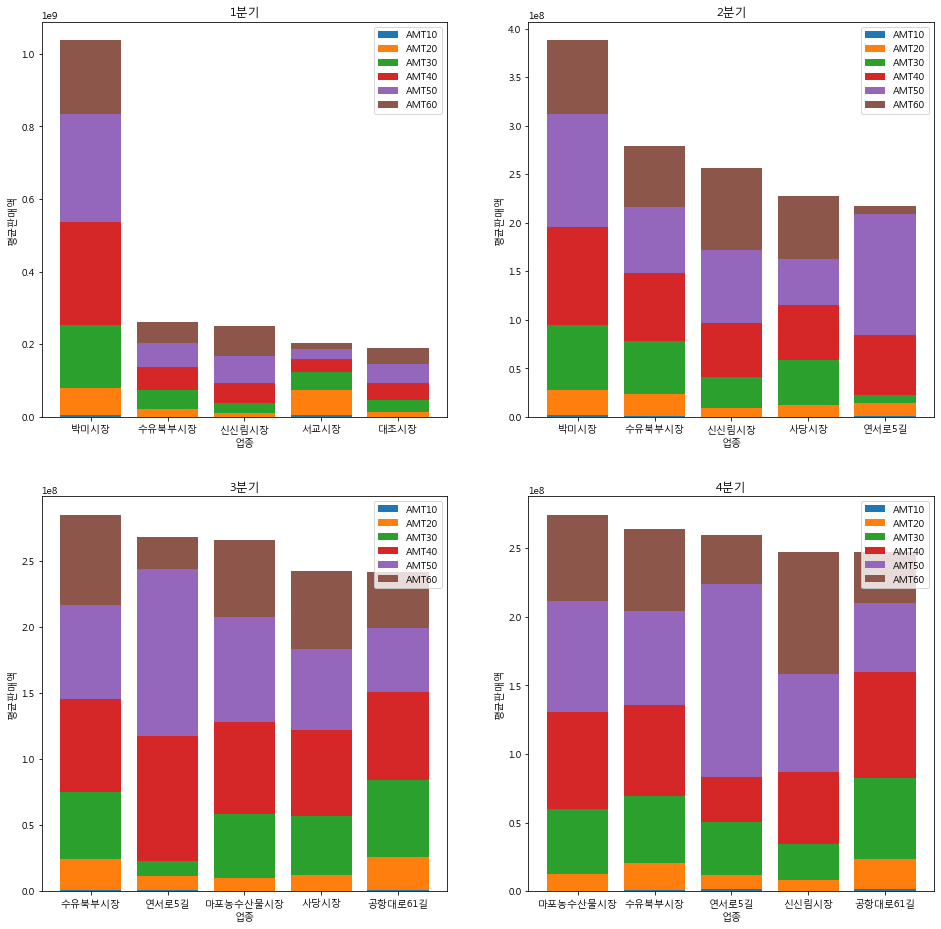

In [8]:
fig = plt.figure()
fig = plt.figure(figsize=(16, 16)) 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(df_query1_age ['S_LOCATION'], df_query1_age ['AMT10'], label='AMT10')
ax1.bar(df_query1_age ['S_LOCATION'], df_query1_age ['AMT20'], label='AMT20' , bottom =  df_query1_age ['AMT10'] )
ax1.bar(df_query1_age ['S_LOCATION'], df_query1_age ['AMT30'], label='AMT30' , bottom =  df_query1_age ['AMT10'] + df_query1_age ['AMT20'])
ax1.bar(df_query1_age ['S_LOCATION'], df_query1_age ['AMT40'], label='AMT40' , bottom =  df_query1_age ['AMT10'] + df_query1_age ['AMT20'] + df_query1_age ['AMT30'])
ax1.bar(df_query1_age ['S_LOCATION'], df_query1_age ['AMT50'], label='AMT50' , bottom =  df_query1_age ['AMT10'] + df_query1_age ['AMT20'] + df_query1_age ['AMT30']+df_query1_age ['AMT40'])
ax1.bar(df_query1_age ['S_LOCATION'], df_query1_age ['AMT60'], label='AMT60' , bottom =  df_query1_age ['AMT10'] + df_query1_age ['AMT20'] + df_query1_age ['AMT30']+df_query1_age ['AMT40'] + df_query1_age ['AMT50'])
ax1.legend(loc='upper right')

ax1.set_title('1분기')
ax1.set_xlabel('업종')
ax1.set_ylabel('평균판매액')
               
ax2.bar(df_query2_age ['S_LOCATION'], df_query2_age ['AMT10'], label='AMT10')
ax2.bar(df_query2_age ['S_LOCATION'], df_query2_age ['AMT20'], label='AMT20' , bottom =  df_query2_age ['AMT10'] )
ax2.bar(df_query2_age ['S_LOCATION'], df_query2_age ['AMT30'], label='AMT30' , bottom =  df_query2_age ['AMT10'] + df_query2_age ['AMT20'])
ax2.bar(df_query2_age ['S_LOCATION'], df_query2_age ['AMT40'], label='AMT40' , bottom =  df_query2_age ['AMT10'] + df_query2_age ['AMT20'] + df_query2_age ['AMT30'])
ax2.bar(df_query2_age ['S_LOCATION'], df_query2_age ['AMT50'], label='AMT50' , bottom =  df_query2_age ['AMT10'] + df_query2_age ['AMT20'] + df_query2_age ['AMT30']+df_query2_age ['AMT40'])
ax2.bar(df_query2_age ['S_LOCATION'], df_query2_age ['AMT60'], label='AMT60' , bottom =  df_query2_age ['AMT10'] + df_query2_age ['AMT20'] + df_query2_age ['AMT30']+df_query2_age ['AMT40'] + df_query2_age ['AMT50'])
ax2.legend(loc='upper right')

ax2.set_title('2분기')
ax2.set_xlabel('업종')
ax2.set_ylabel('평균판매액')

ax3.bar(df_query3_age ['S_LOCATION'], df_query3_age ['AMT10'], label='AMT10')
ax3.bar(df_query3_age ['S_LOCATION'], df_query3_age ['AMT20'], label='AMT20' , bottom =  df_query3_age ['AMT10'] )
ax3.bar(df_query3_age ['S_LOCATION'], df_query3_age ['AMT30'], label='AMT30' , bottom =  df_query3_age ['AMT10'] + df_query3_age ['AMT20'])
ax3.bar(df_query3_age ['S_LOCATION'], df_query3_age ['AMT40'], label='AMT40' , bottom =  df_query3_age ['AMT10'] + df_query3_age ['AMT20'] + df_query3_age ['AMT30'])
ax3.bar(df_query3_age ['S_LOCATION'], df_query3_age ['AMT50'], label='AMT50' , bottom =  df_query3_age ['AMT10'] + df_query3_age ['AMT20'] + df_query3_age ['AMT30']+df_query3_age ['AMT40'])
ax3.bar(df_query3_age ['S_LOCATION'], df_query3_age ['AMT60'], label='AMT60' , bottom =  df_query3_age ['AMT10'] + df_query3_age ['AMT20'] + df_query3_age ['AMT30']+df_query3_age ['AMT40'] + df_query3_age ['AMT50'])
ax3.legend(loc='upper right')

ax3.set_title('3분기')
ax3.set_xlabel('업종')
ax3.set_ylabel('평균판매액')


ax4.bar(df_query4_age ['S_LOCATION'], df_query4_age ['AMT10'], label='AMT10')
ax4.bar(df_query4_age ['S_LOCATION'], df_query4_age ['AMT20'], label='AMT20' , bottom =  df_query4_age ['AMT10'] )
ax4.bar(df_query4_age ['S_LOCATION'], df_query4_age ['AMT30'], label='AMT30' , bottom =  df_query4_age ['AMT10'] + df_query4_age ['AMT20'])
ax4.bar(df_query4_age ['S_LOCATION'], df_query4_age ['AMT40'], label='AMT40' , bottom =  df_query4_age ['AMT10'] + df_query4_age ['AMT20'] + df_query4_age ['AMT30'])
ax4.bar(df_query4_age ['S_LOCATION'], df_query4_age ['AMT50'], label='AMT50' , bottom =  df_query4_age ['AMT10'] + df_query4_age ['AMT20'] + df_query4_age ['AMT30']+df_query4_age ['AMT40'])
ax4.bar(df_query4_age ['S_LOCATION'], df_query4_age ['AMT60'], label='AMT60' , bottom =  df_query4_age ['AMT10'] + df_query4_age ['AMT20'] + df_query4_age ['AMT30']+df_query4_age ['AMT40'] + df_query4_age ['AMT50'])
ax4.legend(loc='upper right')

ax4.set_title('4분기')
ax4.set_xlabel('업종')
ax4.set_ylabel('평균판매액')

In [ ]:
#만양로14길은 20대의 매출건수가 가장높다. 블루오션
#박미시장은 다양한 연령대의 매출건수가 높다. 하지만 매출 탑은 아니다.